In [191]:
%matplotlib inline

In [192]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from impala.dbapi import connect
from impala.util import as_pandas
import time
from IPython import display

In [195]:
QUERY = "SELECT * FROM test ORDER BY id LIMIT 100"

In [196]:
conn = connect(host='localhost', port=21050)
cursor = conn.cursor()
cursor.execute(QUERY)
df = as_pandas(cursor)

In [200]:
print cursor.description  # prints the result set's schema
print df

   id random_field
0   2       Wheeee
1   3       Whoooo
2   4      Whaaaaa
3   8       Yeehaw
4  10       Woohoo
5  11       Woohoo
6  15       Woohoo
7  16       Woohoo
8  20       Woohoo


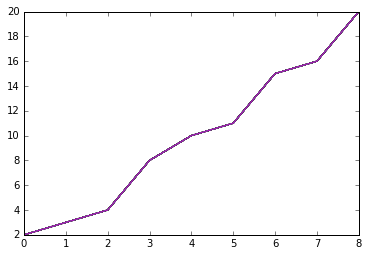

In [201]:
while True:
    try:
        df.ix[:,'id'].plot()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1.0)
        cursor.execute('SELECT * FROM test ORDER BY id LIMIT 100')
        df = as_pandas(cursor)
    except KeyboardInterrupt:
        break